In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

data = pd.read_csv('data.csv')

data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [27]:
# shape of the data

data.shape

(569, 33)

# **Pre-Processing**

In [28]:
for col in data.columns:
    if data[col].isna().sum() > 0:
        print(col, data[col].isna().sum())

# drop the unnamed column
data.drop('Unnamed: 32', axis=1, inplace=True)


Unnamed: 32 569


In [29]:
important_features = [col for col in corr.columns if corr['diagnosis'][col] > 0.7]
important_features.remove('diagnosis')

print(important_features)

['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']


# **Feature Extraction using Prinicipal Component Analysis**

Explained Variance Ratio  [0.42864701 0.18376792]


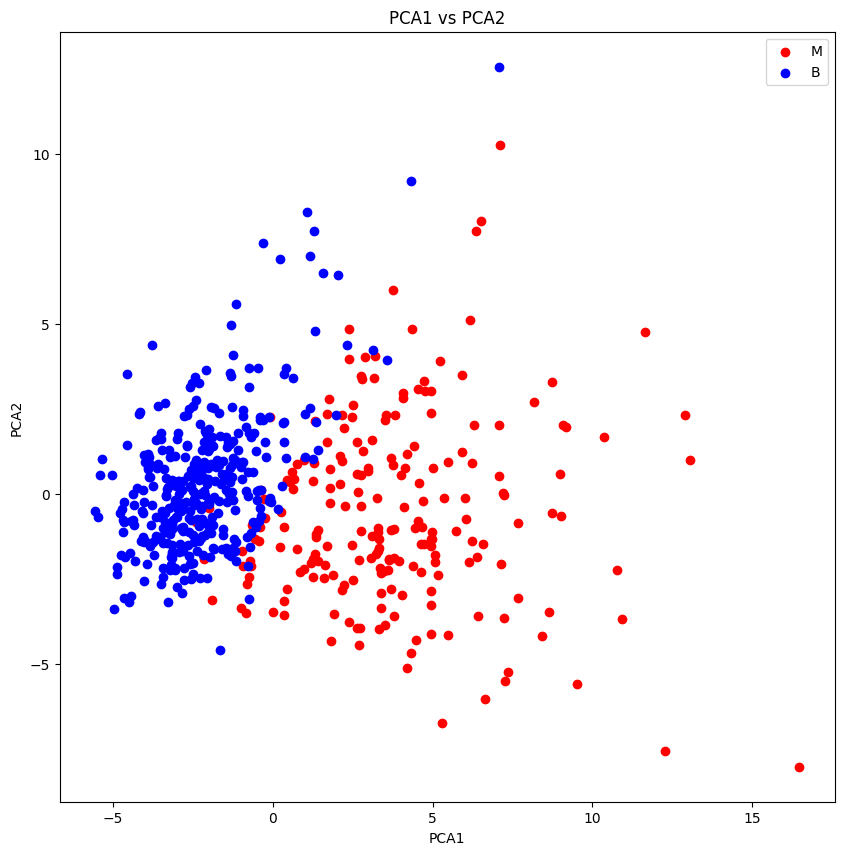

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca_df = data.drop('diagnosis', axis=1)

# standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_df)

# apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

pca_data = pd.DataFrame(pca_data, columns=['pca1', 'pca2'])

explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio ", explained_variance)

# visualize the principal components
plt.figure(figsize=(10,10))
colors = {'M': 'red', 'B': 'blue'}

for diagnosis, color in colors.items():
    plt.scatter(
        pca_data['pca1'][data['diagnosis'] == diagnosis],
        pca_data['pca2'][data['diagnosis'] == diagnosis],
        c = color,
        label = diagnosis
    )

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.title('PCA1 vs PCA2')
plt.show()



Explained Variance Ratio  [0.42864701 0.18376792 0.09146436]


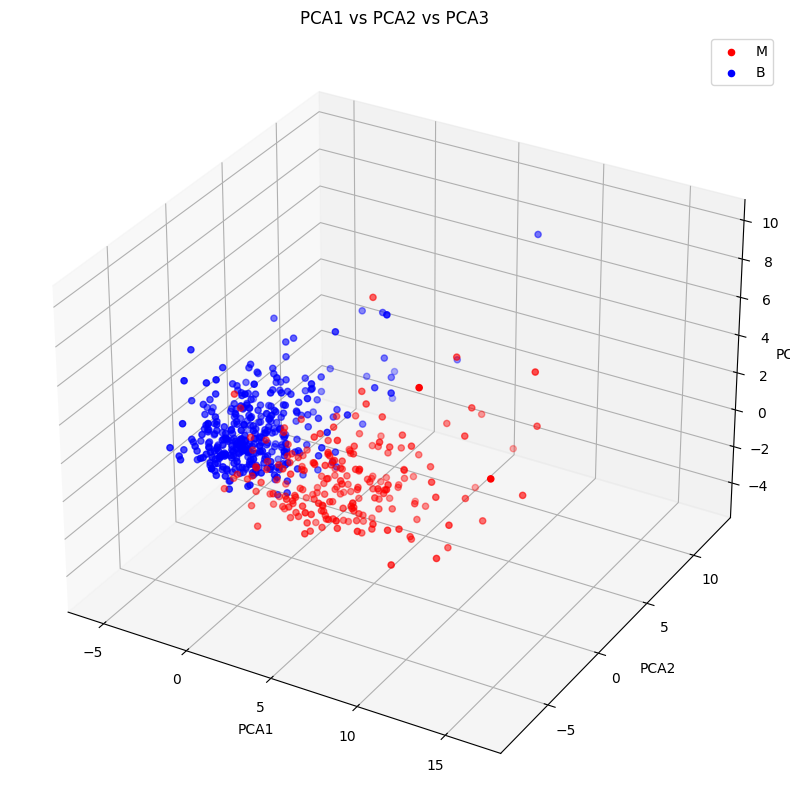

In [31]:
# Principal Component Analysis with n_components = 3

pca_df = data.drop('diagnosis', axis=1)

# standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_df)

# apply PCA
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_data)

pca_data = pd.DataFrame(pca_data, columns=['pca1', 'pca2', 'pca3'])

explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio ", explained_variance)

# visualize the principal components in 3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
colors = {'M': 'red', 'B': 'blue'}

for diagnosis, color in colors.items():
    ax.scatter(
        pca_data['pca1'][data['diagnosis'] == diagnosis],
        pca_data['pca2'][data['diagnosis'] == diagnosis],
        pca_data['pca3'][data['diagnosis'] == diagnosis],
        c = color,
        label = diagnosis
    )

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.legend()
plt.title('PCA1 vs PCA2 vs PCA3')
plt.show()

Explained Variance Ratio  [0.42864701 0.18376792 0.09146436 0.06391475 0.05318759 0.03982815]


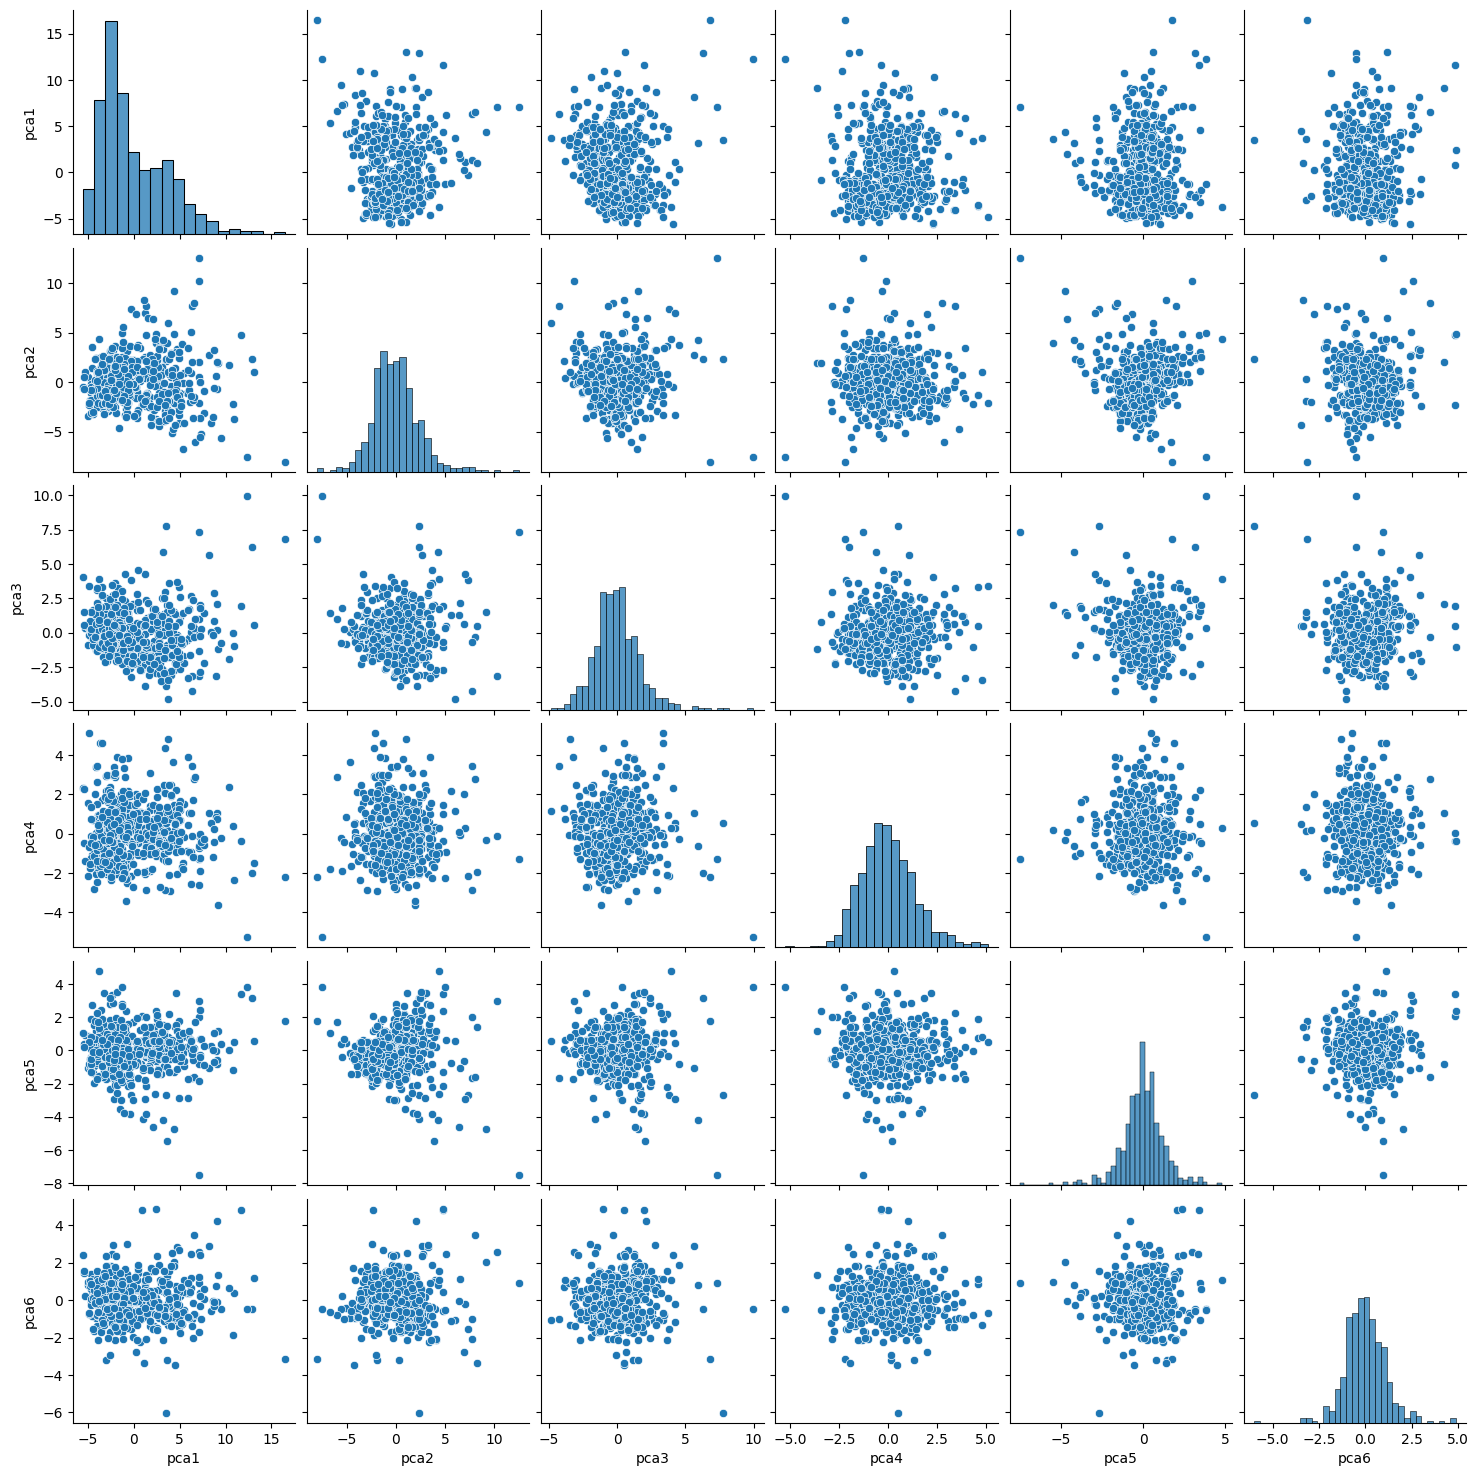

In [32]:
# principal components with n_components = 6

pca_df = data.drop('diagnosis', axis=1)

# standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_df)

# apply PCA
pca = PCA(n_components=6)
pca_data = pca.fit_transform(scaled_data)

pca_data = pd.DataFrame(pca_data, columns=['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6'])

explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio ", explained_variance)

# visualize the principal with n_components = 6
import seaborn as sns

sns.pairplot(pca_data)
plt.show()


# **Tensor Flow**

# **Data Preperation**

In [33]:
X = data.drop('diagnosis', axis=1)  # Features
y = data['diagnosis'].map({'M': 1, 'B': 0})  # Convert 'M' and 'B' to 1 and 0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Model Building**

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Build the model
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [35]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6444 - loss: 0.7327 - val_accuracy: 0.8132 - val_loss: 0.4531
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8831 - loss: 0.3992 - val_accuracy: 0.9121 - val_loss: 0.2743
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9487 - loss: 0.2401 - val_accuracy: 0.9341 - val_loss: 0.2026
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9689 - loss: 0.1773 - val_accuracy: 0.9670 - val_loss: 0.1653
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9568 - loss: 0.1593 - val_accuracy: 0.9670 - val_loss: 0.1438
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9737 - loss: 0.1049 - val_accuracy: 0.9670 - val_loss: 0.1285
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9731 - loss: 0.1004 - val_accuracy: 0.9670 - val_loss: 0.1197
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9760 - loss: 0.0820 - val_accuracy: 0.9670 - val_loss

# **Model Evaluation**

In [36]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9645 - loss: 0.1180 
Test accuracy: 0.9737


# **Predictions**

In [37]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


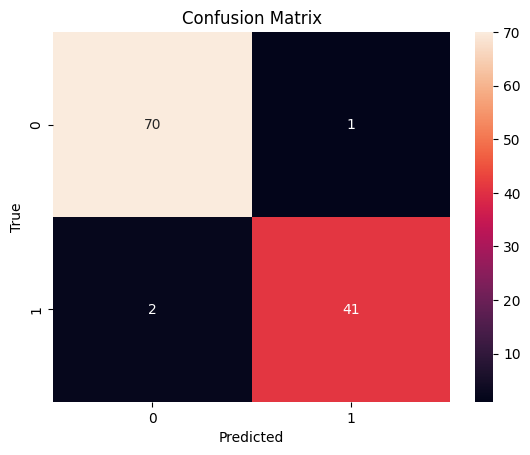

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [38]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, predictions))